<a href="https://colab.research.google.com/github/princeKike27/Poland-House-Prices-Prediction/blob/main/Poland_House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poland House Prices Prediction

For this project I analyzed data from the housing market in 3 cities in Poland Krakow, Warsaw and Poznań ....

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
# load dataset
df_houses = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Poland-House-Prices-Prediction/main/poland_houses.csv',
                        encoding='latin-1', sep=';')

df_houses

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,500.492.242,199.703.793,749000.0,3.0,74.05,2021.0
1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,522.497.745,211.068.857,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,500.669.642,199.200.249,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznañ,2.0,4315.0,52.404.212,16.882.542,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212.225,209.726.299,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...
23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,524.496.489,169.494.082,543000.0,4.0,77.00,2020.0
23760,W³ochy,Warszawa,4.0,10206.0,521.861.093,209.484.377,910000.0,3.0,71.00,2017.0
23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,523.973.449,169.619.394,430695.0,3.0,50.67,2022.0
23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,500.242.313,19.959.569,359000.0,2.0,38.86,2021.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Cleaning & Tidying

In [3]:
# shape of df 
print(df_houses.shape)

(23764, 10)


In [4]:
# column types
df_houses.dtypes

address       object
city          object
floor        float64
id           float64
latitude      object
longitude     object
price        float64
rooms        float64
sq           float64
year         float64
dtype: object

In [5]:
# change floor, rooms, year to int
df_houses['floor'] = df_houses['floor'].astype(int)
df_houses['rooms'] = df_houses['rooms'].astype(int)
df_houses['year'] = df_houses['year'].astype(int)


In [6]:
# unique values of year column
df_houses.year.unique()

array([2021, 1970, 1935, 2020, 2022, 2003, 1982, 1999, 1968, 1989, 2019,
       2005, 1930, 2008, 1960, 2013, 1936, 1890, 2010, 1972, 2016, 2009,
       1990, 2018, 2000, 1974, 1976, 2017, 1980, 1938, 1926, 1963, 2015,
       2012, 1971, 1949, 1977, 1920, 2014, 2007, 2001, 1911, 1973, 2006,
       1975, 1978, 1987, 1984, 2023, 1904, 2004, 1956, 1900, 1966, 1950,
       1931, 1912, 1951, 1955, 1983, 1964, 1905, 1962, 2011, 1939, 1965,
       1967, 2002, 1952, 1927, 1991, 1985, 1953, 1969, 1979, 1910, 1988,
       1954, 1997, 1998, 1886, 1992, 1996, 1959, 1880, 1981, 1916, 1986,
       1918, 1879, 1946, 1901, 1780, 1995, 1908, 1937,   75, 1994, 1864,
       1919, 1923, 1958, 1993, 1915, 1948, 1907, 1957, 1961, 1902, 1924,
       1885, 1934, 1947, 1925, 1913, 1892, 1922, 1929, 1841, 1933, 1897,
       1895, 1932, 1854, 1893, 1903, 1906, 1830, 2980,   80, 1940, 1914,
       1760, 1898, 1928,  202, 1942, 1876, 1899,   70, 1896, 1945, 1784,
       1860, 1889, 1883, 1917,  195, 1921,   81, 19

In [7]:
# select rows with years 75, 214, 2980, 80, 202, 70, 195, 81, 200 
df_houses[(df_houses['year'] == 75) | (df_houses['year'] == 214) | (df_houses['year'] == 2980) |
          (df_houses['year'] == 80) | (df_houses['year'] == 202) | (df_houses['year'] == 70) |
          (df_houses['year'] == 195) | (df_houses['year'] == 81) | (df_houses['year'] == 200)]

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
1032,ródmiecie ¯urawia,Warszawa,1,14485.0,522.319.581,210.067.249,760000.0,3,53.00,75
4345,Targówek Mokra,Warszawa,8,16082.0,522.319.581,210.067.249,520000.0,3,56.00,2980
4513,Wola Krochmalna,Warszawa,10,13832.0,522.319.581,210.067.249,320000.0,1,28.00,80
6458,Bie¿anów-Prokocim Bie¿anów Pod³êska,Kraków,2,21883.0,500.469.432,19.997.153.435.836.600,410000.0,2,48.00,202
7659,Nowe Miasto G³uszyna,Poznañ,2,1603.0,523.263.616,169.628.861,235000.0,2,40.50,70
8972,Grunwald £azarz ul. G³ogowska,Poznañ,1,56.0,524.016.616,169.100.607,329000.0,2,27.80,195
10408,Bemowo ul. Karabeli,Warszawa,9,8116.0,522.319.581,210.067.249,450000.0,2,47.80,81
14431,Stare Miasto Pi¹tkowo os. Boles³awa Chrobrego,Poznañ,1,640.0,524.006.632,1.691.973.259.178.080,375000.0,3,64.00,80
19206,Krowodrza Krowodrza Górka S³omczyñskiego,Kraków,0,27281.0,500.469.432,19.997.153.435.836.600,655000.0,3,73.22,200
22999,Bielany Radiowo Arkuszowa,Warszawa,2,11359.0,522.319.581,210.067.249,660000.0,3,59.00,214


In [8]:
# replace years to correct values 
df_houses['year'].replace({2980: 1980,
                           80: 1980,
                           202: 2002,
                           70: 1970,
                           195: 1950,
                           81: 1981,
                           80: 1980,
                           200: 2000,
                           75: 1975,
                           214: 2014}, inplace=True)

In [9]:
# check changes
df_houses.dtypes

address       object
city          object
floor          int64
id           float64
latitude      object
longitude     object
price        float64
rooms          int64
sq           float64
year           int64
dtype: object

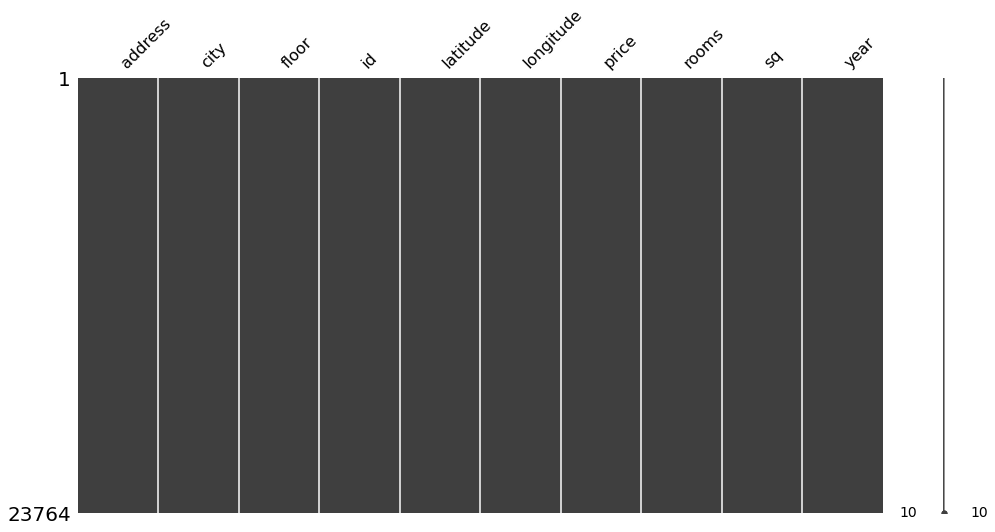

In [10]:
# check for missing values
import missingno as msg

msg.matrix(df_houses, figsize=(16, 8))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Analysis

In [11]:
# descriptive statistics of numeric columns
df_houses.describe()

,floor,id,price,rooms,sq,year
count,23764.000000,23764.000000,2.376400e+04,23764.000000,2.376400e+04,23764.000000
mean,2.808744,15621.964484,6.493536e+05,2.620771,1.027249e+02,2001.209939
std,2.463467,8617.293898,5.326970e+05,0.996530,6.533688e+03,31.164981
min,0.000000,1.000000,5.000000e+03,1.000000,8.800000e+00,1070.000000
25%,1.000000,8420.750000,4.115461e+05,2.000000,4.200000e+01,1985.000000
50%,2.000000,15637.500000,5.200000e+05,3.000000,5.389500e+01,2019.000000
75%,4.000000,23111.250000,6.999990e+05,3.000000,6.891500e+01,2021.000000
max,10.000000,30308.000000,1.500000e+07,10.000000,1.007185e+06,2024.000000


### Houses per City

In [12]:
# function to calculate number_houses and avg_price

def city_calc(df): 
  # dict to store columns
  calc = {}
  calc['number_houses'] = len(df.id)
  calc['avg_price'] = df['price'].mean()

  # return a Pandas Series
  return pd.Series(calc, index=['number_houses', 'avg_price'])

In [13]:
# groupby city & apply function
houses_city = df_houses.groupby(['city']).apply(city_calc).reset_index()

# add %_homes column
houses_city['%_homes'] = (houses_city.number_houses / len(df_houses)) * 100

houses_city.head()

,city,number_houses,avg_price,%_homes
0,Kraków,9764.0,593756.068258,41.087359
1,Poznañ,4149.0,468527.120154,17.459182
2,Warszawa,9851.0,780619.918237,41.453459


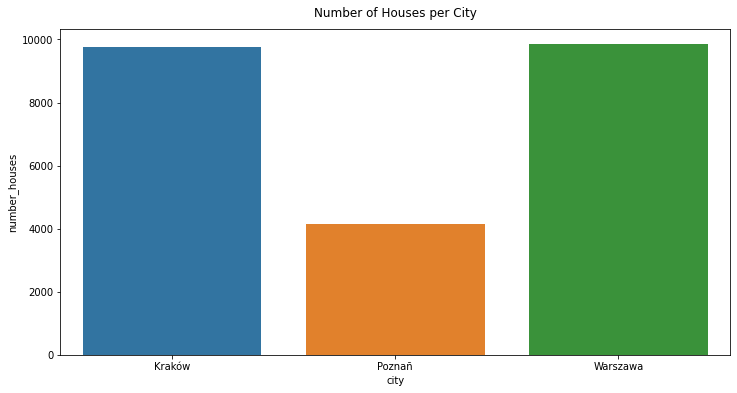

In [14]:
# plot number of houses per city
f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='city', y='number_houses', data=houses_city)

plt.title('Number of Houses per City', pad=12)

plt.show()

- As can be seen in the graph and table above more than 80% of the houses are located in Warsaw and Krakow $9851$ and $9764$ respectively.

- The avg house price per city is higher in Warsaw which is the capital city of Poland $780,634$ $zloty$ ($167,348$ $euros$), followed by Krakow $593,756$ $zloty$ ($127,286$ $euros$) and by Poznan, the smallest of the three cities, $468,527$ $zloty$ ($100,440$ $euros$)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Avg Floors, Rooms and Square Meters per City

In [15]:
# function to calculate 'avg_floors', 'avg_rooms', and 'avg_sq_meters'

def averages_calc(df):
  # dictionary to store calculations
  calc = {}
  calc['avg_floors'] = df.floor.mean()
  calc['avg_rooms'] = df.rooms.mean()
  calc['avg_sq_meters'] = df.sq.mean()

  # return Series
  return pd.Series(calc, index=['avg_floors', 'avg_rooms', 'avg_sq_meters'])

In [16]:
# groupby city & apply function
houses_avg_city = df_houses.groupby(['city']).apply(averages_calc).reset_index()

houses_avg_city

,city,avg_floors,avg_rooms,avg_sq_meters
0,Kraków,2.540045,2.598730,160.720631
1,Poznañ,2.323210,2.657026,61.263203
2,Warszawa,3.279566,2.627347,62.704040


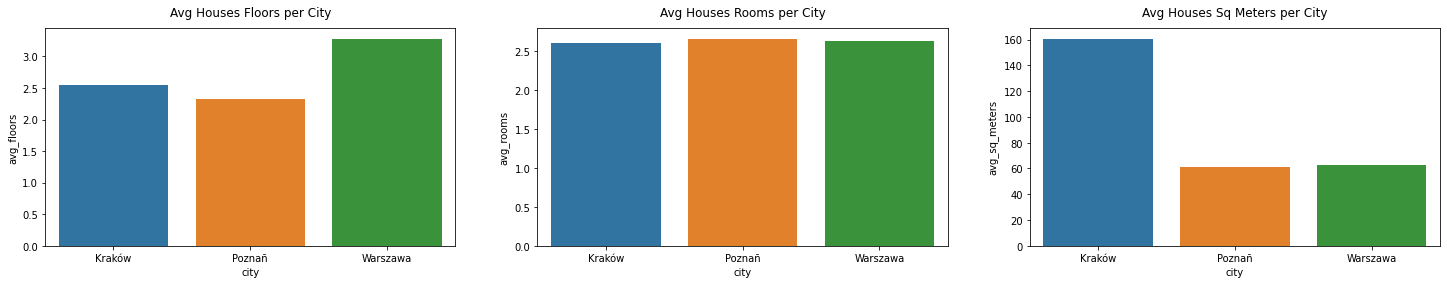

In [17]:
# barplot 

fig = plt.figure(figsize=(25, 4))

# avg_floors per city
ax = plt.subplot(1, 3, 1)
sns.barplot(x='city', y='avg_floors', data=houses_avg_city)
plt.title('Avg Houses Floors per City', pad=12)

# avg rooms per city
ax = plt.subplot(1, 3, 2)
sns.barplot(x='city', y='avg_rooms', data=houses_avg_city)
plt.title('Avg Houses Rooms per City', pad=12)

# avg sq_meters per city
ax = plt.subplot(1, 3, 3)
sns.barplot(x='city', y='avg_sq_meters', data=houses_avg_city)
plt.title('Avg Houses Sq Meters per City', pad=12)


plt.show()

- As can be seen in the plots and table above the **Avg Floors per Houses** is higher in $Warsaw$ the capital city of Poland with $3$ floors per house. On the other hand $Krakow$ and $Poznan$, both have an avg of $2$ floors per house.

- In terms of **Avg Rooms per Houses**, all three cities have on avg $2.5$ rooms per house.

- Aditionally, the **Avg Sq Meters per House** are significantly higher in $Krakow$, with an average of $160m^2$ per house, it exceeds in more than double the average of $Warsaw$ and $Poznan$, $62m^2$ and $61m^2$ respectively.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Avg Houses per Year

In [18]:
# function that calculates avg_houses & avg_price per year
def average_houses(df):
  # dictionary to store calculations
  calc = {}
  calc['avg_houses'] = df.id.count()
  calc['avg_price'] = df.price.mean()

  # return Series
  return pd.Series(calc, index=['avg_houses', 'avg_price'])

In [19]:
# groupby year and city
houses_year = df_houses.groupby(['year', 'city']).apply(average_houses).reset_index()

# '%' of houses 
houses_year['%'] = (houses_year.avg_houses / df_houses.id.count()) * 100

houses_year.sort_values(by='avg_houses', ascending=False, inplace=True)

# select top 20 years with more houses
top_20 = houses_year.head(20)
top_20

,year,city,avg_houses,avg_price,%
387,2021,Kraków,2465.0,5.447005e+05,10.372833
384,2020,Kraków,1656.0,5.913433e+05,6.968524
390,2022,Kraków,1247.0,5.148134e+05,5.247433
389,2021,Warszawa,1243.0,6.887584e+05,5.230601
385,2020,Poznañ,1088.0,5.102572e+05,4.578354
391,2022,Poznañ,929.0,4.323993e+05,3.909275
386,2020,Warszawa,916.0,7.790521e+05,3.854570
392,2022,Warszawa,844.0,6.079946e+05,3.551591
388,2021,Poznañ,675.0,4.623591e+05,2.840431
381,2019,Kraków,341.0,8.314649e+05,1.434944


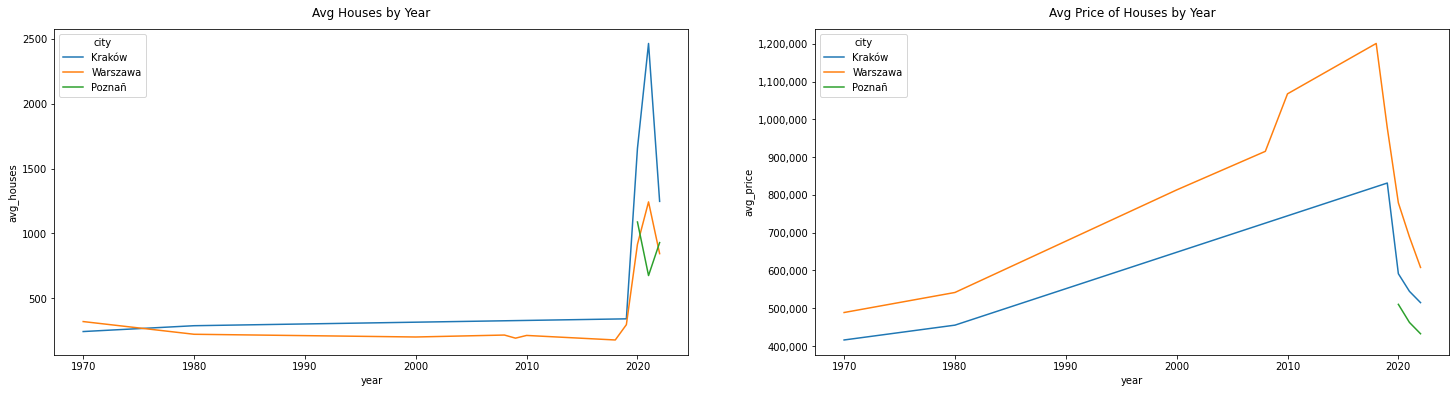

In [20]:
# lineplot
fig = plt.figure(figsize=(25, 6))

# lineplot year - avg houses
ax = plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='avg_houses', data=top_20, hue='city')
plt.title('Avg Houses by Year', pad=12)

# lineplot year - avg house price
ax = plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='avg_price', data=top_20, hue='city')
# set y_ticks
ax.set_yticklabels(['0', '400,000', '500,000', '600,000', '700,000', '800,000', '900,000',
                   '1,000,000', '1,100,000', '1,200,000'])

plt.title('Avg Price of Houses by Year', pad=12)


plt.show()

- As can be seen in the lineplot **Avg Houses by Year** there has been a significant increase in the avg number of houses after 2019. The biggest raise corresponds to the city of $Krakow$ which from 2019 to 2020 had a raise of $385$%, $1315$ more houses for sale.

- On the other hand, the lineplot **Avg Price of Houses by Year** shows the average trend of house prices in $Krakow$, $Warsaw$ and $Poznan$ from 1970 to 2022. Even though, average house prices have been increasing throught the years, there has been a significant reduction in the average house price in the three cities after they achieve their highest price in 2018 - 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Floors & Rooms Distribution

In [21]:
# number of houses by floors
df_houses['floor'].value_counts()

1     4971
2     4009
0     3750
3     3648
4     2752
5     1536
6      934
10     746
7      616
8      468
9      334
Name: floor, dtype: int64

- $80$% of the houses have 4 floors or less. Houses with more than 4 floors are already buildings so they aren't going to be taken into consideration. 

In [22]:
# number of houses by number of rooms
df_houses['rooms'].value_counts()

2     8806
3     8437
4     3109
1     2595
5      644
6      136
7       23
10       8
8        5
9        1
Name: rooms, dtype: int64

- $96$% of the houses have 4 rooms or less. Houses with more than 4 rooms are not going to be taken into account since they could be potential outliers that could affect the accuracy of the model

In [23]:
# filter df <= 4  floors
df_houses = df_houses[df_houses['floor'] <= 4]

# filter df <= 4 rooms
df_houses = df_houses[df_houses['rooms'] <= 4]

df_houses

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,23918.0,500.492.242,199.703.793,749000.0,3,74.05,2021
1,Praga-Po³udnie Grochowska,Warszawa,3,17828.0,522.497.745,211.068.857,240548.0,1,24.38,2021
2,Krowodrza Czarnowiejska,Kraków,2,22784.0,500.669.642,199.200.249,427000.0,2,37.00,1970
5,Nowa Huta Czy¿yny ul. Woniców,Kraków,2,26071.0,500.469.432,19.997.153.435.836.600,414600.0,1,34.55,2022
6,Podgórze P³aszów Koszykarska,Kraków,0,22569.0,500.498.929,199.906.026,750000.0,4,81.40,2021
...,...,...,...,...,...,...,...,...,...,...
23758,Nowe Miasto Rataje Wagrowska,Poznañ,3,4516.0,523.789.966,169.442.442,294021.0,2,35.23,2022
23759,Stare Miasto Naramowice,Poznañ,0,3976.0,524.496.489,169.494.082,543000.0,4,77.00,2020
23760,W³ochy,Warszawa,4,10206.0,521.861.093,209.484.377,910000.0,3,71.00,2017
23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0,4952.0,523.973.449,169.619.394,430695.0,3,50.67,2022


floor Mean: 1.825554953979426
floor Median: 2.0
floor Skewness: 0.18329430887205117 

rooms Mean: 2.5220898754737413
rooms Median: 3.0
rooms Skewness: 0.0337789487777992 



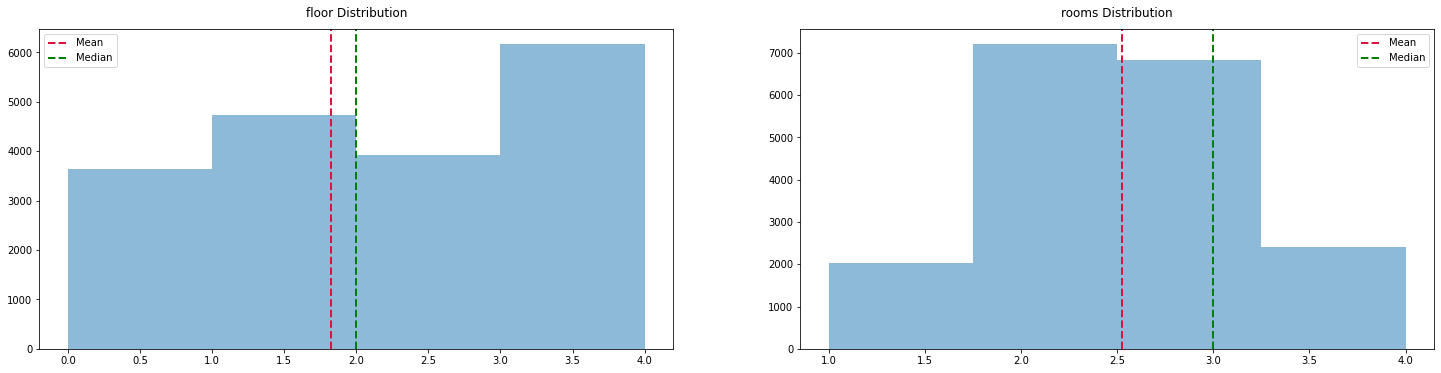

In [24]:
# features list
features = ['floor', 'rooms']

# plot counter
counter = 1

fig = plt.figure(figsize=(25, 20))
# plot histogram for each feature
for el in features:
  ax = plt.subplot(3, 2, counter)

  # histogram
  plt.hist(x=df_houses[el], alpha=0.5, bins=4)
  # mean
  plt.axvline(x=df_houses[el].mean(), color='crimson', linestyle='dashed', linewidth=2, label='Mean')
  # median
  plt.axvline(x=df_houses[el].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

  print(f'{el} Mean: {df_houses[el].mean()}')
  print(f'{el} Median: {df_houses[el].median()}')
  print(f'{el} Skewness: {df_houses[el].skew()}', '\n')

  plt.legend()
  plt.title(f'{el} Distribution', pad=12)

  counter += 1

plt.show()




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Square Meters Distribution

In [25]:
# number of houses > 150 m^2
df_houses[df_houses['sq'] > 150]

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
179,Pr¹dnik Czerwony Marka Eminowicza,Kraków,1,25162.0,500.868.616,199.696.987,1045000.0,4,200.00,1984
332,Wilanów Urodzajna,Warszawa,1,6436.0,521.692.344,210.789.978,2800000.0,4,178.80,2005
461,Zwierzyniec Wola Justowska,Kraków,0,29440.0,500.650.619,19.877.649,1104000.0,4,175.00,2014
686,Mokotów Bia³ej Koniczyny,Warszawa,0,9361.0,521.842.458,21.042.709,2715606.0,4,168.00,2021
943,Wilanów ul. Janczarów,Warszawa,0,6654.0,522.319.581,210.067.249,2400000.0,4,204.50,2010
...,...,...,...,...,...,...,...,...,...,...
22082,Stare Miasto,Kraków,1,29311.0,500.590.398,1.993.716.829.792.890,4998000.0,4,178.50,2013
22390,Zwierzyniec Pó³wsie Zwierzynieckie Junacka,Kraków,0,30287.0,500.667.032,198.488.749,1164744.0,4,184.88,2015
23160,Stare Miasto pl. Na Groblach,Kraków,4,30307.0,500.561.004,199.320.048,5000000.0,4,170.00,2013
23255,Je¿yce Zacisze,Poznañ,3,3833.0,52.412.666,169.143.664,869000.0,4,158.78,1903


- Houses with more than $150 m^2$ are not going to be taken into account because they are outliers and will generate noise in the model.

In [26]:
# number of houses < 25 m^2 and with more than 1 floor
df_houses[(df_houses['sq'] < 25)  & (df_houses['floor'] > 1)]

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
1,Praga-Po³udnie Grochowska,Warszawa,3,17828.0,522.497.745,211.068.857,240548.0,1,24.38,2021
18,Krowodrza Stanis³awa Konarskiego,Kraków,2,27706.0,500.840.413,1.997.816.046.757.790,280000.0,1,16.20,1930
48,Ochota Grójecka,Warszawa,4,12808.0,52.211.874,20.977.725,319000.0,1,23.00,1960
122,Stare Miasto,Kraków,4,22172.0,500.590.398,1.993.716.829.792.890,399000.0,1,24.50,1930
173,Ochota,Warszawa,3,9397.0,52.212.225,209.726.299,328500.0,2,24.00,1970
...,...,...,...,...,...,...,...,...,...,...
23279,Ochota Adama P³uga,Warszawa,3,7817.0,522.163.558,209.858.349,320000.0,1,18.00,1923
23306,Wola ul. O¿arowska,Warszawa,4,10034.0,522.465.852,209.546.547,285000.0,1,20.00,1950
23402,Stare Miasto w. Gertrudy,Kraków,2,19048.0,500.594.355,199.419.231,280000.0,1,14.03,1886
23442,Ochota Stara Ochota ul. Karola Dickensa,Warszawa,3,10409.0,522.057.522,20.971.997,328500.0,2,23.50,1970


- Houses with less than $25$$m^2$ and with more than $1$ floor are not going to be taken into account because they are outliers and will generate noise in the model.

In [27]:
# filter houses !>= 150 m^2
df_houses = df_houses[df_houses['sq'] <= 150]
# filter houses > 25m^2 and floor > 1
df_houses = df_houses[(df_houses['sq'] > 25) & (df_houses['floor'] > 1)]

df_houses = df_houses.reset_index()

Houses m^2 Mean: 56.96138351983722
Houses m^2 Median: 53.22
Houses m^2 Skewness: 1.1551877685537852


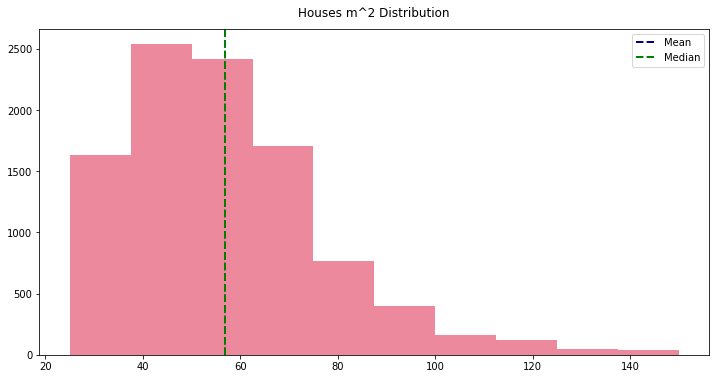

In [28]:
# plot distribution of m^2


f, ax = plt.subplots(figsize=(12, 6))

plt.hist(x=df_houses['sq'], alpha=0.5, color='crimson')
# mean
plt.axvline(x=df_houses['sq'].mean(), linestyle='dashed', linewidth=2, color='navy', label='Mean')
# median
plt.axvline(x=df_houses['sq'].mean(), linestyle='dashed', linewidth=2, color='green', label='Median')

print(f'Houses m^2 Mean: {df_houses.sq.mean()}')
print(f'Houses m^2 Median: {df_houses.sq.median()}')
print(f'Houses m^2 Skewness: {df_houses.sq.skew()}')

plt.legend()
plt.title('Houses m^2 Distribution', pad=12)

plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Features Encoding

- The new columns that are going to be created are:
  - is_warsaw >> 1 if the house is located in Warsaw
  - is_greater_1970 >> 1 if the house was built in a year greater than 1970.

In [29]:
df_houses.head()

,index,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,23918.0,500.492.242,199.703.793,749000.0,3,74.05,2021
1,2,Krowodrza Czarnowiejska,Kraków,2,22784.0,500.669.642,199.200.249,427000.0,2,37.00,1970
2,5,Nowa Huta Czy¿yny ul. Woniców,Kraków,2,26071.0,500.469.432,19.997.153.435.836.600,414600.0,1,34.55,2022
3,8,Ursynów Wy¿yny,Warszawa,3,11387.0,521.402.821,210.563.452,615000.0,4,63.40,1982
4,11,Praga-Po³udnie Goc³aw,Warszawa,2,13355.0,522.286.331,211.065.722,520000.0,3,67.00,1989


In [30]:
# new column creation

# is_warwaw >> 1 if the house is located in Warsaw
df_houses['is_warsaw'] = [1 if df_houses.iloc[index].city == 'Warszawa' else 0 for index in df_houses.index]
# is_greater_1970 >> 1 if the house is >= 1970
df_houses['is_greater_1970'] = [1 if df_houses.iloc[index].year >= 1970 else 0 for index in df_houses.index]


In [31]:
# check changes
df_houses.head()

,index,address,city,floor,id,latitude,longitude,price,rooms,sq,year,is_warsaw,is_greater_1970
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,23918.0,500.492.242,199.703.793,749000.0,3,74.05,2021,0,1
1,2,Krowodrza Czarnowiejska,Kraków,2,22784.0,500.669.642,199.200.249,427000.0,2,37.00,1970,0,1
2,5,Nowa Huta Czy¿yny ul. Woniców,Kraków,2,26071.0,500.469.432,19.997.153.435.836.600,414600.0,1,34.55,2022,0,1
3,8,Ursynów Wy¿yny,Warszawa,3,11387.0,521.402.821,210.563.452,615000.0,4,63.40,1982,1,1
4,11,Praga-Po³udnie Goc³aw,Warszawa,2,13355.0,522.286.331,211.065.722,520000.0,3,67.00,1989,1,1


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Features Selection

- The features **(Inputs)** that are going to be selected for the *prediction model* are:
  - *is_warsaw, floor, rooms, sq, is_greater_1970*

- The **Outputs** for the model is the *price* variable.
  - the prices are in $zloty$, polands currency. $1$ $zloty$ $=$ $0.21$ $euros$

In [32]:
# create new df
df_houses_raw = df_houses[['is_warsaw', 'floor', 'rooms', 'sq', 'is_greater_1970', 'price']]

df_houses_raw.head()

,is_warsaw,floor,rooms,sq,is_greater_1970,price
0,0,2,3,74.05,1,749000.0
1,0,2,2,37.00,1,427000.0
2,0,2,1,34.55,1,414600.0
3,1,3,4,63.40,1,615000.0
4,1,2,3,67.00,1,520000.0


In [33]:
# create price in euro column
df_houses_raw['price_euro'] = df_houses_raw['price'] * 0.21

# create price per sq column
df_houses_raw['price_per_sq'] = df_houses_raw['price_euro'] / df_houses_raw['sq']

df_houses_raw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,is_warsaw,floor,rooms,sq,is_greater_1970,price,price_euro,price_per_sq
0,0,2,3,74.05,1,749000.0,157290.0,2124.105334
1,0,2,2,37.00,1,427000.0,89670.0,2423.513514
2,0,2,1,34.55,1,414600.0,87066.0,2520.000000
3,1,3,4,63.40,1,615000.0,129150.0,2037.066246
4,1,2,3,67.00,1,520000.0,109200.0,1629.850746


In [34]:
# descriptive statistics of df
df_houses_raw.describe()

,is_warsaw,floor,rooms,sq,is_greater_1970,price,price_euro,price_per_sq
count,9830.000000,9830.000000,9830.000000,9830.000000,9830.000000,9.830000e+03,9.830000e+03,9830.000000
mean,0.369278,2.872940,2.541709,56.961384,0.837030,5.986284e+05,1.257120e+05,2213.005892
std,0.482634,0.796159,0.831176,20.359094,0.369358,3.342458e+05,7.019161e+04,735.971713
min,0.000000,2.000000,1.000000,25.010000,0.000000,6.900000e+04,1.449000e+04,439.090909
25%,0.000000,2.000000,2.000000,42.180000,1.000000,4.119692e+05,8.651354e+04,1753.389960
50%,0.000000,3.000000,3.000000,53.220000,1.000000,5.150000e+05,1.081500e+05,2058.000000
75%,1.000000,4.000000,3.000000,67.235000,1.000000,6.750000e+05,1.417500e+05,2520.000000
max,1.000000,4.000000,4.000000,150.000000,1.000000,9.008000e+06,1.891680e+06,23821.684926


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Features Standarization

- **Normalization** is going to be used on *sq* features because they are in different scales and there distributions are skewed. This technique will map the values to a new range of 0 to 1.


$$ Normalization = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [35]:
# features df
features_df = df_houses_raw[['sq']]

In [36]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# initialize scaler
scaler = MinMaxScaler()
# normalize data
features = scaler.fit_transform(features_df) 

In [37]:
# check normalization on first record
features[0]

array([0.39235139])

In [38]:
# create df to continue further analysis of normalized features
df_features = pd.DataFrame(features, columns=['sq'])


# add is_warsaw column
df_features['is_warsaw'] = df_houses_raw['is_warsaw']
# add floor column
df_features['floor'] = df_houses_raw['floor']
# add rooms 
df_features['rooms'] = df_houses_raw['rooms']
# add is_greater_1970
df_features['is_greater_1970'] = df_houses_raw['is_greater_1970']
# add price column
df_features['price_euro'] = df_houses_raw['price_euro']


df_features.head()

,sq,is_warsaw,floor,rooms,is_greater_1970,price_euro
0,0.392351,0,2,3,1,157290.0
1,0.095928,0,2,2,1,89670.0
2,0.076326,0,2,1,1,87066.0
3,0.307145,1,3,4,1,129150.0
4,0.335947,1,2,3,1,109200.0


- The Normalization of Sq is not going to be used. Since the house price is in thousands of euros if Sq is in a range from 0 to 1 its coeffcicent is going to be huge

In [39]:
df_features['sq'] = df_houses_raw['sq']

df_features.head()

,sq,is_warsaw,floor,rooms,is_greater_1970,price_euro
0,74.05,0,2,3,1,157290.0
1,37.00,0,2,2,1,89670.0
2,34.55,0,2,1,1,87066.0
3,63.40,1,3,4,1,129150.0
4,67.00,1,2,3,1,109200.0


In [40]:
df_features.describe()

,sq,is_warsaw,floor,rooms,is_greater_1970,price_euro
count,9830.000000,9830.000000,9830.000000,9830.000000,9830.000000,9.830000e+03
mean,56.961384,0.369278,2.872940,2.541709,0.837030,1.257120e+05
std,20.359094,0.482634,0.796159,0.831176,0.369358,7.019161e+04
min,25.010000,0.000000,2.000000,1.000000,0.000000,1.449000e+04
25%,42.180000,0.000000,2.000000,2.000000,1.000000,8.651354e+04
50%,53.220000,0.000000,3.000000,3.000000,1.000000,1.081500e+05
75%,67.235000,1.000000,4.000000,3.000000,1.000000,1.417500e+05
max,150.000000,1.000000,4.000000,4.000000,1.000000,1.891680e+06


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Correlation Between Features

### Correlation Heatmap

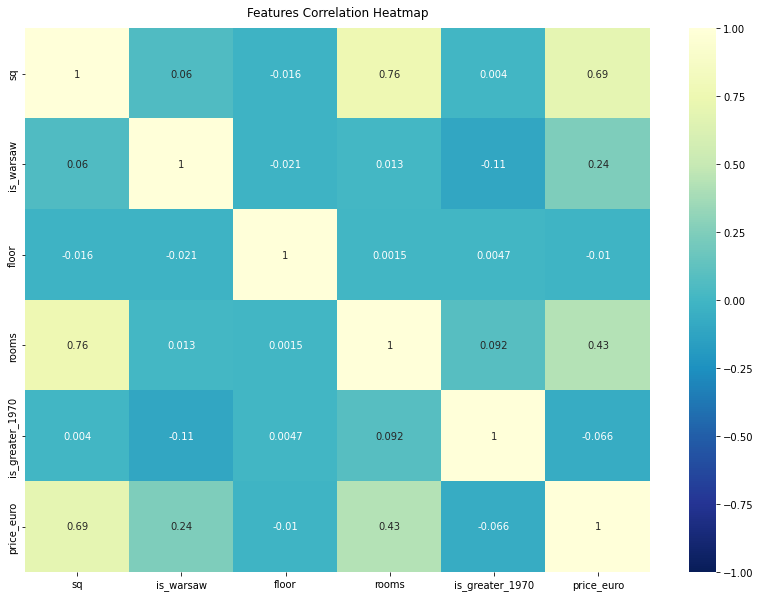

In [41]:
# heatmap of features correlation
f, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(df_features.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

plt.title('Features Correlation Heatmap', pad=12)
plt.show()

- As can be seen in the **Heatmap** above there is little or none *Multicolinearity* between the features. None of them is lower than $-0.5$ and 2 are greater than $0.5$. This means, that the features selected are linearly independent among them and are suitable for a *Linear Regression Model*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Linear Regression Model

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x3 + \beta_4 x4 + \beta_5 x_5 $$

### Train Test Split

In [42]:
# xs
xs = df_features[['is_warsaw', 'floor', 'rooms', 'sq', 'is_greater_1970']]
xs = np.array(xs)

# turn to tensor
xs = torch.tensor(xs)

xs

tensor([[ 0.0000,  2.0000,  3.0000, 74.0500,  1.0000],
        [ 0.0000,  2.0000,  2.0000, 37.0000,  1.0000],
        [ 0.0000,  2.0000,  1.0000, 34.5500,  1.0000],
        ...,
        [ 0.0000,  3.0000,  2.0000, 35.2300,  1.0000],
        [ 1.0000,  4.0000,  3.0000, 71.0000,  1.0000],
        [ 1.0000,  2.0000,  3.0000, 63.0000,  1.0000]], dtype=torch.float64)

In [43]:
# y
y = df_features['price_euro']
y = np.array(y)

# turn to tensor
y = torch.tensor(y)

y

tensor([157290.0000,  89670.0000,  87066.0000,  ...,  61744.4100,
        191100.0000, 127008.0000], dtype=torch.float64)

In [44]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split data into training and test
xs_train, xs_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=100)

# check xs and y train 
print(f'xs_train length: {len(xs_train)}')
print(f'y_train length: {len(y_train)}', '\n')

# check xs and y test
print(f'xs_test length: {len(xs_test)}')
print(f'y_test length: {len(y_test)}')

xs_train length: 7864
y_train length: 7864 

xs_test length: 1966
y_test length: 1966


In [45]:
# check y_train
y_train

tensor([145110.0000, 139658.4000, 115500.0000,  ...,  67122.9300,
        157500.0000,  71190.0000], dtype=torch.float64)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Step 1: Forward Pass

In [46]:
# regression function to calculate y_hats >> coefficient * column vector of x
def regression(x, b_0, b_1, b_2, b_3, b_4, b_5):
    return b_0 + b_1*x[:, 0] + b_2*x[:, 1] + b_3*x[:, 2] + b_4*x[:, 3] + b_5*x[:, 4]



In [47]:
# initialize parameters with tracking gradient
b_0 = torch.tensor([20000.]).requires_grad_()
b_1 = torch.tensor([550.5]).requires_grad_()
b_2 = torch.tensor([908.5]).requires_grad_()
b_3 = torch.tensor([10340.8]).requires_grad_()
b_4 = torch.tensor([510.2]).requires_grad_()
b_5 = torch.tensor([240.1]).requires_grad_()

In [48]:
# y_hats
y_hats = regression(xs_train, b_0, b_1, b_2, b_3, b_4, b_5)


print(y_hats.shape, '\n')  
y_hats

torch.Size([7864]) 



tensor([ 87538.5802, 114226.3604,  62579.9001,  ...,  52045.7023,
         92691.6003,  63882.0761], dtype=torch.float64, grad_fn=<AddBackward0>)

In [49]:
# function to plot y vs y_hats
def plot_ys(y, y_hat):

  # turn tensors into arrays
  y = y.detach().numpy()
  y_hat = y_hat.detach().numpy()

  # plot scatterplot
  f, ax = plt.subplots(figsize=(12, 6))

  sns.scatterplot(x=y, y=y_hat, color='crimson', alpha=0.4)
  plt.xlabel('Actual Price: $Y_i$')
  plt.ylabel('Predicted Price: $\hat{Y}_i$')

  plt.title('Actual House Price Vs Predicted House Price', pad=12)

  plt.show()

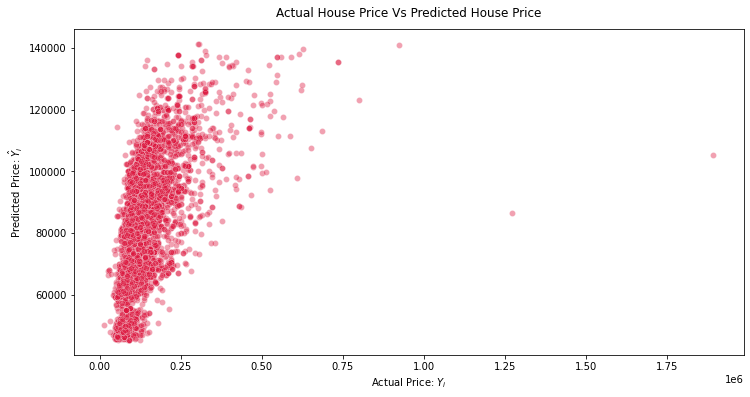

In [50]:
# plot ys Vs y_hat
plot_ys(y_train, y_hats)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Step 2: Calculate Cost $C$

- We are going to use **Mean Square Error**, averages the quadratic cost $(\hat{y} - y)^2$ across multiple data points:

$$ C = \frac{1}{n} \sum_{i=1}^n  (\hat{y} - y)^2$$

In [51]:
# function that calculates Cost
def mse(y, y_hat):
  cost = 0

  for i in range(len(y)):
    cost += (y_hat[i] - y[i])**2

  cost = cost/len(y)

  return cost

In [52]:
# calculate Cost
C = mse(y_train, y_hats)

print(f'Cost: {C}')
C

Cost: 5749589533.7376175


tensor(5.7496e+09, dtype=torch.float64, grad_fn=<DivBackward0>)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Step 3: Calculate $\nabla C$ with Respect to Paramaters

#### Autodiff

In [53]:
# backward propagate C
C.backward()

In [54]:
# Partial Derivative of dC/dB_0 >> y_intercept
print('dC/dB_0')
b_0.grad

dC/dB_0


tensor([-93020.0938])

In [55]:
# Partial Derivative of dC/dB_1 >> is_warsaw
print('dC/dB_1')
b_1.grad

dC/dB_1


tensor([-49677.8828])

In [56]:
# Partial Derivative of dC/dB_2 >> floor
print('dC/dB_2')
b_2.grad

dC/dB_2


tensor([-265444.2812])

In [57]:
# Partial Derivative of dC/dB_3 >> rooms
print('dC/dB_3')
b_3.grad

dC/dB_3


tensor([-258401.9219])

In [58]:
# Partial Derivative of dC/dB_4 >> sq
print('dC/dB_4')
b_4.grad

dC/dB_4


tensor([-6514242.5000])

In [59]:
# Partial Derivative of dC/dB_5 >> is_greater_1970
print('dC/dB_5')
b_5.grad

dC/dB_5


tensor([-73901.7422])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Manual Calculation of $\nabla C$ with Respect to Parameters

- Our parameters $b_0,b_1,b_2,b_3,b_4,b_5$ determine $\hat{y}$



$$ C = \frac{1}{n} \sum_{i=1}^n (\hat{y} - y)^2 $$
<br>
$$ u = (\hat{y} - y) $$
$$ C = \frac{1}{n} \sum u^2 $$
<br>

- Partial Derivative of $u$ with respect to $\hat{y}$:
  - $\frac{du}{d\hat{y}} = 1 - 0 = 1$

<br>

- Partial Derivative of $C$ with respect to $u$:
  
  - $\frac{dC}{du} = \frac{1}{n} \sum u^2 = \frac{1}{n} \sum 2u $
  <br>

  - $\frac{dC}{du} = \frac{2}{n} \sum (\hat{y} - y) $

<br>

- Partial Derivative of $C$ with respect to $\hat{y}$: 

  - $\frac{dC}{d\hat{y}} = \frac{dC}{du} \frac{du}{d\hat{y}} = \frac{2}{n} \sum (\hat{y} - y) * 1$
  <br>

  - $\frac{dC}{d\hat{y}} = \frac{2}{n} \sum(\hat{y} - y) $


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

$$ \hat{y}_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x3 + \beta_4 x4 + \beta_5 x_5 $$
<br>

- Partial Derivative of $\hat{y}$ with respect to $b_0$:
  - $ \frac{d\hat{y}}{db_0} = 1 + 0 + 0 + 0 + 0 + 0 = 1 $

<br>

- Partial Derivative of $\hat{y}$ with respect to $b_1$:
  - $\frac{d\hat{y}}{db_1} = 0 + x_1 + 0 + 0 + 0 + 0 = x_1$

<br>

- Partial Derivative of $\hat{y}$ with respect to $b_2$:
  - $\frac{d\hat{y}}{db_2} = 0 + 0 + x_2 + 0 + 0 + 0 = x_2$

<br>

- Partial Derivative of $\hat{y}$ with respect to $b_3$:
  - $\frac{d\hat{y}}{db_3} = 0 + 0 + 0 + x_3 + 0 + 0 = x_3$

<br>

- Partial Derivative of $\hat{y}$ with respect to $b_4$:
  - $\frac{d\hat{y}}{db_4} = 0 + 0 + 0 + 0 + x_4 + 0 = x_4$

<br>

- Partial Derivative of $\hat{y}$ with respect to $b_5$:
  - $\frac{d\hat{y}}{db_5} = 0 + 0 + 0 + 0 + 0 + x_5 = x_5$



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Partial Derivative of $C$ with respect to $b_0$ *(y-intercept)*

$$ \frac{dC}{db_0} = \frac{dC}{du} \frac{du}{d\hat{y}} \frac{d\hat{y}}{db_0} $$
<br>
$$ \frac{dC}{db_0} = \frac{2}{n} \sum(\hat{y} - y) * 1 $$

In [62]:
# dC/db_0 >> (2/n) * SUM(y_hats-y) * 1
dC_db0 = 0

for i in range(len(y_train)):
  dC_db0 += y_hats[i] - y_train[i]

dC_db0 = (2/len(y_train)) * dC_db0

print('dC/db_0 >> (2/n) * SUM(y_hats-y) * 1', '\n')
print(f'dC_db_0: {dC_db0}')
print(f'Autodiff: {b_0.grad[0]}')

dC/db_0 >> 2/n SUM(y_hats-y) * 1 

dC_db_0: -93020.09537402896
Autodiff: -93020.09375


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Partial Derivative of $C$ with respesct to $b_1$ *(is_warsaw)*

$$ \frac{dC}{db_1} = \frac{dC}{du} \frac{du}{d\hat{y}} \frac{d\hat{y}}{db_1}  $$
<br>
$$ \frac{dC}{db_1} = \frac{2}{n} \sum (\hat{y} - y) * x_1 $$


In [63]:
# function to calculate partial derivatives of params b_1 to b_5
def deriv_params(ys, y_hats, x):
  dC_dp = 0

  for i in range(len(ys)):
    dC_dp += (y_hats[i] - ys[i]) * x[i]

  dC_dp = (2/len(ys)) * dC_dp

  return dC_dp 

In [66]:
xs_train[:, 0]

tensor([1., 0., 1.,  ..., 0., 1., 0.], dtype=torch.float64)

In [70]:
# dC_db1 >> (2/n) * SUM(y_hats - y) * x_1
dC_db1 = deriv_params(y_train, y_hats, xs_train[:, 0])

print('dC_db1 >> (2/n) * SUM(y_hats - y) * x_1', '\n')
print(f'dC_db1: {dC_db1}')
print(f'Autodiff: {b_1.grad[0]}')

dC_db1 >> (2/n) * SUM(y_hats - y) * x_1 

dC_db1: -49677.8812835667
Autodiff: -49677.8828125
